# Akım ve Güç Kolonları ile Arıza Tespit Model

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
# Veriyi yükleyelim
df = pd.read_csv("yeni_veri/firin_verileri_temizlenmis.csv")

In [68]:
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

## Durum Sınıflandırması

In [69]:
# guç ve amper kolonları
kolon_ciftleri = [
    ('on_isitma_guc_%', 'on_isitma_amp.'),
    ('ceh.1_ust1_guc_%', 'ceh.1_ust1_amp.'),
    ('ceh.1_ust2_guc_%', 'ceh.1_ust2_amp.'),
    ('ceh.1_alt1_guc_%', 'ceh.1_alt1_amp.'),
    ('ceh.2_ust1_guc_%', 'ceh.2_ust1_amp.'),
    ('ceh.2_ust2_guc_%', 'ceh.2_ust2_amp.'),
    ('ceh.2_alt1_guc_%', 'ceh.2_alt1_amp.'),
    ('ceh.2_alt2_guc_%', 'ceh.2_alt2_amp.'),
    ('ceh.3_ust1_guc_%', 'ceh.3_ust1_amp.'),
    ('ceh.3_ust2_guc_%', 'ceh.3_ust2_amp.'),
    ('ceh.3_alt1_guc_%', 'ceh.3_alt1_amp.'),
    ('ceh.3_alt2_guc_%', 'ceh.3_alt2_amp.')
]

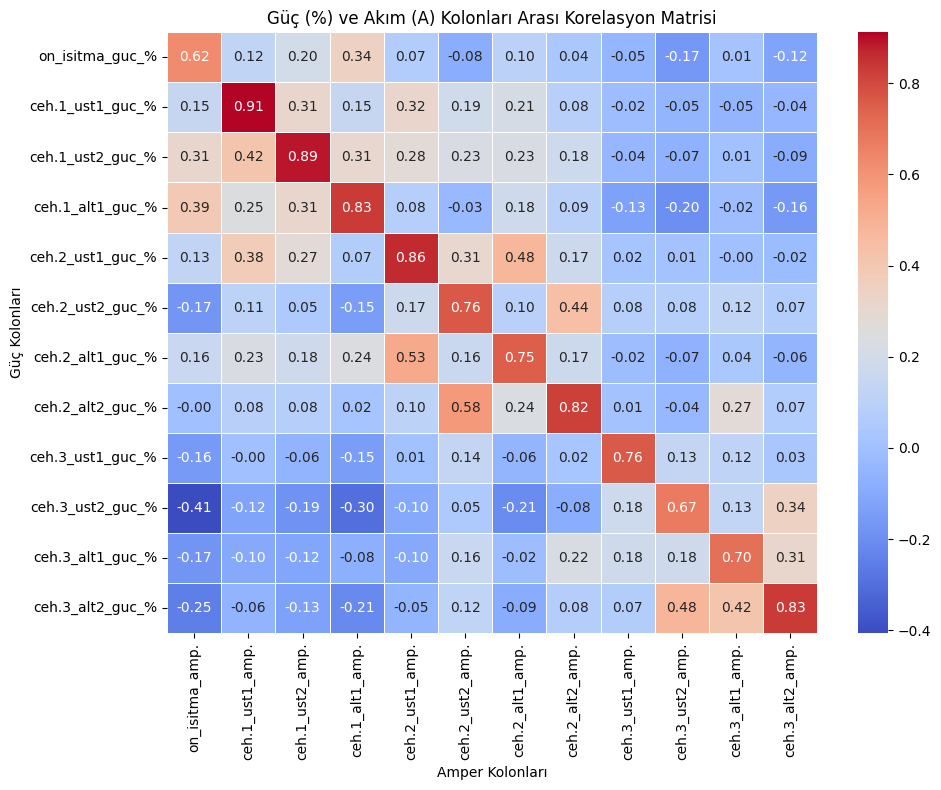

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Kolon isimlerini ayır
guc_kolonlari = [guc for guc, _ in kolon_ciftleri]
amp_kolonlari = [amp for _, amp in kolon_ciftleri]

# Sadece bu kolonlardan oluşan veri
df_subset = df[guc_kolonlari + amp_kolonlari]

# Korelasyon matrisini al
corr_matrix = df_subset.corr().loc[guc_kolonlari, amp_kolonlari]  # sadece güç vs amper ilişkileri

# Görselleştir
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Güç (%) ve Akım (A) Kolonları Arası Korelasyon Matrisi")
plt.xlabel("Amper Kolonları")
plt.ylabel("Güç Kolonları")
plt.tight_layout()
plt.show()


Korelasyonu 0.80'den yüksek çiftler seçilere modelde kullanılacak. 

In [71]:
kolon_ciftleri = [
    ('ceh.1_ust1_guc_%', 'ceh.1_ust1_amp.'),
    ('ceh.1_ust2_guc_%', 'ceh.1_ust2_amp.'),
    ('ceh.1_alt1_guc_%', 'ceh.1_alt1_amp.'),
    ('ceh.2_ust1_guc_%', 'ceh.2_ust1_amp.'),
    ('ceh.2_ust2_guc_%', 'ceh.2_ust2_amp.'),
    ('ceh.2_alt1_guc_%', 'ceh.2_alt1_amp.'),
    ('ceh.2_alt2_guc_%', 'ceh.2_alt2_amp.'),
    ('ceh.3_alt2_guc_%', 'ceh.3_alt2_amp.')]

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import time

# === Durum sınıflandırıcı fonksiyon ===
def durum_siniflandir(guc, akim):
    if guc >= 9 and akim >= 100:
        return "✅ Isıtma aktif"
    elif akim == 0 and guc == 0:
        return "🔍 Arızalı/Durmuş Kontrol Edilmeli"
    elif akim >= 100 and guc == 0:
        return "⚠️ Güç sensör hatası"
    elif akim == 0 and guc >= 9:
        return "⚠️ Akım sensör hatası"
    else:
        return "🤔 Diğer"


In [73]:
for guc_kolon, amp_kolon in kolon_ciftleri:
    durum_kolon = guc_kolon.replace('guc_%', 'durum')

        # Durum sınıflandırması
    df[durum_kolon] = df.apply(
        lambda row: durum_siniflandir(row[guc_kolon], row[amp_kolon]),
        axis=1
    )

    # Durum sayısı özeti
    durum_sayilari = df[durum_kolon].value_counts()
    print(f"📊 {durum_kolon} Durum Özeti:")
    print(durum_sayilari)
    print("--------------------------------------------------")

        

📊 ceh.1_ust1_durum Durum Özeti:
ceh.1_ust1_durum
✅ Isıtma aktif                       17961
🔍 Arızalı/Durmuş Kontrol Edilmeli     3664
⚠️ Akım sensör hatası                  414
⚠️ Güç sensör hatası                    73
🤔 Diğer                                 28
Name: count, dtype: int64
--------------------------------------------------
📊 ceh.1_ust2_durum Durum Özeti:
ceh.1_ust2_durum
✅ Isıtma aktif                       20473
🔍 Arızalı/Durmuş Kontrol Edilmeli     1111
⚠️ Akım sensör hatası                  431
🤔 Diğer                                 83
⚠️ Güç sensör hatası                    42
Name: count, dtype: int64
--------------------------------------------------
📊 ceh.1_alt1_durum Durum Özeti:
ceh.1_alt1_durum
✅ Isıtma aktif                       17671
🔍 Arızalı/Durmuş Kontrol Edilmeli     2500
⚠️ Akım sensör hatası                 1222
⚠️ Güç sensör hatası                   697
🤔 Diğer                                 50
Name: count, dtype: int64
----------------------------

In [74]:
df.columns

Index(['datetime', 'prg', 'giris_isi', 'on_isitma_set_isi', 'on_isitma_isi',
       'on_isitma_guc_%', 'on_isitma_amp.', 'ceh.1_ust1_set_isi',
       'ceh.1_ust1_isi', 'ceh.1_ust1_guc_%', 'ceh.1_ust1_amp.',
       'ceh.1_ust2_set_isi', 'ceh.1_ust2__isi', 'ceh.1_ust2_guc_%',
       'ceh.1_ust2_amp.', 'ceh.1_alt1_set_isi', 'ceh.1_alt1_isi',
       'ceh.1_alt1_guc_%', 'ceh.1_alt1_amp.', 'ceh.2_ust1_set_isi',
       'ceh.2_ust1_isi', 'ceh.2_ust1_guc_%', 'ceh.2_ust1_amp.',
       'ceh.2_ust2_set_isi', 'ceh.2_ust2_isi', 'ceh.2_ust2_guc_%',
       'ceh.2_ust2_amp.', 'ceh.2_alt1_set_isi', 'ceh.2_alt1_isi',
       'ceh.2_alt1_guc_%', 'ceh.2_alt1_amp.', 'ceh.2_alt2_set_isi',
       'ceh.2_alt2_isi', 'ceh.2_alt2_guc_%', 'ceh.2_alt2_amp.',
       'ceh.3_ust1_set_isi', 'ceh.3_ust1_isi', 'ceh.3_ust1_guc_%',
       'ceh.3_ust1_amp.', 'ceh.3_ust2_set_isi', 'ceh.3_ust2_isi',
       'ceh.3_ust2_guc_%', 'ceh.3_ust2_amp.', 'ceh.3_alt1_set_isi',
       'ceh.3_alt1_isi', 'ceh.3_alt1_guc_%', 'ceh.3_alt1_amp.

## Genel Uyarı Sütunu (genel_uyari)

In [75]:
# Bu kod her satır için tüm bileşenlerin durumlarını tarıyor ve eğer herhangi birinde bir uyarı durumu varsa o satıra '🚨 Uyarı', yoksa '✅ Normal' etiketi veriyor.
# Hedef sütunlar (Korelasyonu yüksek olanlar)
durum_kolonlari = [
     'ceh.1_ust1_durum', 'ceh.1_ust2_durum',
    'ceh.1_alt1_durum', 'ceh.2_ust1_durum', 'ceh.2_ust2_durum',
    'ceh.2_alt1_durum', 'ceh.2_alt2_durum', 'ceh.3_alt2_durum'
]

# Uyarı durumu: Aktif dışında kalan her şey
uyari_durumlari = [
    '🔍 Arızalı/Durmuş Kontrol Edilmeli',
    '⚠️ Akım sensör hatası',
    '⚠️ Güç sensör hatası',
    '🤔 Diğer'
]

# Satırda herhangi bir uyarı varsa "🚨 Uyarı", yoksa "✅ Normal"
df['genel_uyari'] = df[durum_kolonlari].apply(
    lambda row: '🚨 Uyarı' if any(durum in uyari_durumlari for durum in row) else '✅ Normal',
    axis=1
)


In [76]:
# Toplam uyarı sayısı
toplam_uyari = (df['genel_uyari'] == '🚨 Uyarı').sum()
print(f"Toplam uyarı sayısı: {toplam_uyari}")

print(df['genel_uyari'].value_counts())

Toplam uyarı sayısı: 10398
genel_uyari
✅ Normal    11742
🚨 Uyarı     10398
Name: count, dtype: int64


In [77]:
df.head()

,datetime,prg,giris_isi,on_isitma_set_isi,on_isitma_isi,on_isitma_guc_%,on_isitma_amp.,ceh.1_ust1_set_isi,ceh.1_ust1_isi,ceh.1_ust1_guc_%,...,cikis_per.fan_hz,ceh.1_ust1_durum,ceh.1_ust2_durum,ceh.1_alt1_durum,ceh.2_ust1_durum,ceh.2_ust2_durum,ceh.2_alt1_durum,ceh.2_alt2_durum,ceh.3_alt2_durum,genel_uyari
0,2024-11-01 08:00:00,1.0,337.0,550.0,549.0,75.0,647.0,680.0,705.0,0.0,...,0.0,🔍 Arızalı/Durmuş Kontrol Edilmeli,✅ Isıtma aktif,🔍 Arızalı/Durmuş Kontrol Edilmeli,✅ Isıtma aktif,✅ Isıtma aktif,✅ Isıtma aktif,✅ Isıtma aktif,✅ Isıtma aktif,🚨 Uyarı
1,2024-11-01 08:01:00,1.0,343.0,550.0,547.0,75.0,641.0,680.0,701.0,0.0,...,0.0,🔍 Arızalı/Durmuş Kontrol Edilmeli,✅ Isıtma aktif,✅ Isıtma aktif,✅ Isıtma aktif,✅ Isıtma aktif,✅ Isıtma aktif,✅ Isıtma aktif,✅ Isıtma aktif,🚨 Uyarı
2,2024-11-01 08:02:00,1.0,336.0,550.0,551.0,74.0,638.0,680.0,704.0,0.0,...,0.0,🔍 Arızalı/Durmuş Kontrol Edilmeli,✅ Isıtma aktif,✅ Isıtma aktif,✅ Isıtma aktif,✅ Isıtma aktif,✅ Isıtma aktif,✅ Isıtma aktif,✅ Isıtma aktif,🚨 Uyarı
3,2024-11-01 08:03:00,1.0,329.0,550.0,547.0,75.0,645.0,680.0,709.0,0.0,...,0.0,🔍 Arızalı/Durmuş Kontrol Edilmeli,✅ Isıtma aktif,✅ Isıtma aktif,✅ Isıtma aktif,✅ Isıtma aktif,✅ Isıtma aktif,✅ Isıtma aktif,✅ Isıtma aktif,🚨 Uyarı
4,2024-11-01 08:04:00,1.0,345.0,550.0,552.0,69.0,495.0,680.0,704.0,0.0,...,0.0,🔍 Arızalı/Durmuş Kontrol Edilmeli,✅ Isıtma aktif,✅ Isıtma aktif,✅ Isıtma aktif,✅ Isıtma aktif,✅ Isıtma aktif,✅ Isıtma aktif,✅ Isıtma aktif,🚨 Uyarı


In [78]:
df.columns

Index(['datetime', 'prg', 'giris_isi', 'on_isitma_set_isi', 'on_isitma_isi',
       'on_isitma_guc_%', 'on_isitma_amp.', 'ceh.1_ust1_set_isi',
       'ceh.1_ust1_isi', 'ceh.1_ust1_guc_%', 'ceh.1_ust1_amp.',
       'ceh.1_ust2_set_isi', 'ceh.1_ust2__isi', 'ceh.1_ust2_guc_%',
       'ceh.1_ust2_amp.', 'ceh.1_alt1_set_isi', 'ceh.1_alt1_isi',
       'ceh.1_alt1_guc_%', 'ceh.1_alt1_amp.', 'ceh.2_ust1_set_isi',
       'ceh.2_ust1_isi', 'ceh.2_ust1_guc_%', 'ceh.2_ust1_amp.',
       'ceh.2_ust2_set_isi', 'ceh.2_ust2_isi', 'ceh.2_ust2_guc_%',
       'ceh.2_ust2_amp.', 'ceh.2_alt1_set_isi', 'ceh.2_alt1_isi',
       'ceh.2_alt1_guc_%', 'ceh.2_alt1_amp.', 'ceh.2_alt2_set_isi',
       'ceh.2_alt2_isi', 'ceh.2_alt2_guc_%', 'ceh.2_alt2_amp.',
       'ceh.3_ust1_set_isi', 'ceh.3_ust1_isi', 'ceh.3_ust1_guc_%',
       'ceh.3_ust1_amp.', 'ceh.3_ust2_set_isi', 'ceh.3_ust2_isi',
       'ceh.3_ust2_guc_%', 'ceh.3_ust2_amp.', 'ceh.3_alt1_set_isi',
       'ceh.3_alt1_isi', 'ceh.3_alt1_guc_%', 'ceh.3_alt1_amp.

## Hedef Değişkenin Hazırlanması

In [79]:
df['genel_uyari_flag'] = df['genel_uyari'].map({
    '✅ Normal': 0,
    '🚨 Uyarı': 1
})

In [80]:
## Test aşamasında veri almak için
df.to_csv("yeni_veri/test_ariza_tespit_model_veriler_guc_amper.csv", index=False)

## Tüm Sensörler ile Model Eğitimi

In [81]:
sensor_cols = [
    'giris_isi', 'on_isitma_set_isi', 'on_isitma_isi', 'on_isitma_guc_%', 'on_isitma_amp.',
    'ceh.1_ust1_set_isi', 'ceh.1_ust1_isi', 'ceh.1_ust1_guc_%', 'ceh.1_ust1_amp.',
    'ceh.1_ust2_set_isi', 'ceh.1_ust2__isi', 'ceh.1_ust2_guc_%', 'ceh.1_ust2_amp.',
    'ceh.1_alt1_set_isi', 'ceh.1_alt1_isi', 'ceh.1_alt1_guc_%', 'ceh.1_alt1_amp.',
    'ceh.2_ust1_set_isi', 'ceh.2_ust1_isi', 'ceh.2_ust1_guc_%', 'ceh.2_ust1_amp.',
    'ceh.2_ust2_set_isi', 'ceh.2_ust2_isi', 'ceh.2_ust2_guc_%', 'ceh.2_ust2_amp.',
    'ceh.2_alt1_set_isi', 'ceh.2_alt1_isi', 'ceh.2_alt1_guc_%', 'ceh.2_alt1_amp.',
    'ceh.2_alt2_set_isi', 'ceh.2_alt2_isi', 'ceh.2_alt2_guc_%', 'ceh.2_alt2_amp.',
    'ceh.3_ust1_set_isi', 'ceh.3_ust1_isi', 'ceh.3_ust1_guc_%', 'ceh.3_ust1_amp.',
    'ceh.3_ust2_set_isi', 'ceh.3_ust2_isi', 'ceh.3_ust2_guc_%', 'ceh.3_ust2_amp.',
    'ceh.3_alt1_set_isi', 'ceh.3_alt1_isi', 'ceh.3_alt1_guc_%', 'ceh.3_alt1_amp.',
    'ceh.3_alt2_set_isi', 'ceh.3_alt2_isi', 'ceh.3_alt2_guc_%', 'ceh.3_alt2_amp.',
    'sogutma1_isi', 'sogutma2_isi', 'sogutma3_isi',
    'rulo_frekans_hz', 'giris_per.fan_hz', 'cikis_per.fan_hz'
]


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Sadece sensör kolonlarını ve hedefi al
X = df[sensor_cols].copy()
y = df['genel_uyari'].copy()

# Hedef değişkeni sayısala çevir (0=Normal, 1=Uyarı)
le = LabelEncoder()
y = le.fit_transform(y)

# Eksik veri varsa temizle
X = X.dropna()

# X ve y senkronize olsun
y = y[X.index]

# Eğitim/test ayrımı
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)



In [83]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report

model = LGBMClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))

[LightGBM] [Info] Number of positive: 7279, number of negative: 8219
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004549 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6319
[LightGBM] [Info] Number of data points in the train set: 15498, number of used features: 53
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.469674 -> initscore=-0.121455
[LightGBM] [Info] Start training from score -0.121455
              precision    recall  f1-score   support

    ✅ Normal       1.00      1.00      1.00      3523
     🚨 Uyarı       1.00      1.00      1.00      3119

    accuracy                           1.00      6642
   macro avg       1.00      1.00      1.00      6642
weighted avg       1.00      1.00      1.00      6642



C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


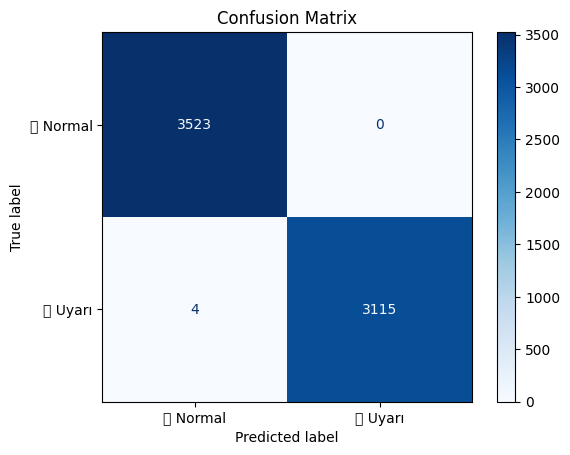

In [84]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion matrix oluştur
cm = confusion_matrix(y_test, y_pred)

# Görselleştir
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['✅ Normal', '🚨 Uyarı'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


In [85]:
df.head()

,datetime,prg,giris_isi,on_isitma_set_isi,on_isitma_isi,on_isitma_guc_%,on_isitma_amp.,ceh.1_ust1_set_isi,ceh.1_ust1_isi,ceh.1_ust1_guc_%,...,ceh.1_ust1_durum,ceh.1_ust2_durum,ceh.1_alt1_durum,ceh.2_ust1_durum,ceh.2_ust2_durum,ceh.2_alt1_durum,ceh.2_alt2_durum,ceh.3_alt2_durum,genel_uyari,genel_uyari_flag
0,2024-11-01 08:00:00,1.0,337.0,550.0,549.0,75.0,647.0,680.0,705.0,0.0,...,🔍 Arızalı/Durmuş Kontrol Edilmeli,✅ Isıtma aktif,🔍 Arızalı/Durmuş Kontrol Edilmeli,✅ Isıtma aktif,✅ Isıtma aktif,✅ Isıtma aktif,✅ Isıtma aktif,✅ Isıtma aktif,🚨 Uyarı,1
1,2024-11-01 08:01:00,1.0,343.0,550.0,547.0,75.0,641.0,680.0,701.0,0.0,...,🔍 Arızalı/Durmuş Kontrol Edilmeli,✅ Isıtma aktif,✅ Isıtma aktif,✅ Isıtma aktif,✅ Isıtma aktif,✅ Isıtma aktif,✅ Isıtma aktif,✅ Isıtma aktif,🚨 Uyarı,1
2,2024-11-01 08:02:00,1.0,336.0,550.0,551.0,74.0,638.0,680.0,704.0,0.0,...,🔍 Arızalı/Durmuş Kontrol Edilmeli,✅ Isıtma aktif,✅ Isıtma aktif,✅ Isıtma aktif,✅ Isıtma aktif,✅ Isıtma aktif,✅ Isıtma aktif,✅ Isıtma aktif,🚨 Uyarı,1
3,2024-11-01 08:03:00,1.0,329.0,550.0,547.0,75.0,645.0,680.0,709.0,0.0,...,🔍 Arızalı/Durmuş Kontrol Edilmeli,✅ Isıtma aktif,✅ Isıtma aktif,✅ Isıtma aktif,✅ Isıtma aktif,✅ Isıtma aktif,✅ Isıtma aktif,✅ Isıtma aktif,🚨 Uyarı,1
4,2024-11-01 08:04:00,1.0,345.0,550.0,552.0,69.0,495.0,680.0,704.0,0.0,...,🔍 Arızalı/Durmuş Kontrol Edilmeli,✅ Isıtma aktif,✅ Isıtma aktif,✅ Isıtma aktif,✅ Isıtma aktif,✅ Isıtma aktif,✅ Isıtma aktif,✅ Isıtma aktif,🚨 Uyarı,1


In [86]:
# Örnek bir satır al
test_sample = X.iloc[[1410]]

# Modelle tahmin et
prediction = model.predict(test_sample)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


# Tahmini etikete çevir ve göster
predicted_label = label_encoder.inverse_transform(prediction)[0]
print("Modelin tahmini:", predicted_label)

# ✅ Normal : 0
# 🚨 Uyarı  : 1

Modelin tahmini: 0


In [87]:
import pandas as pd

test_sample = pd.DataFrame([{
    'giris_isi': 340.0,
    'on_isitma_set_isi': 550.0,
    'on_isitma_isi': 548.0,
    'on_isitma_guc_%': 75.0,
    'on_isitma_amp.': 640.0,
    'ceh.1_ust1_set_isi': 680.0,
    'ceh.1_ust1_isi': 705.0,
    'ceh.1_ust1_guc_%': 0.0,
    'ceh.1_ust1_amp.': 0.0,
    'ceh.1_ust2_set_isi': 680.0,
    'ceh.1_ust2_isi': 700.0,
    'ceh.1_ust2_guc_%': 0.0,
    'ceh.1_ust2_amp.': 0.0,
    'ceh.1_alt1_set_isi': 680.0,
    'ceh.1_alt1_isi': 698.0,
    'ceh.1_alt1_guc_%': 0.0,
    'ceh.1_alt1_amp.': 0.0,
    'ceh.2_ust1_set_isi': 680.0,
    'ceh.2_ust1_isi': 703.0,
    'ceh.2_ust1_guc_%': 0.0,
    'ceh.2_ust1_amp.': 0.0,
    'ceh.2_ust2_set_isi': 680.0,
    'ceh.2_ust2_isi': 706.0,
    'ceh.2_ust2_guc_%': 0.0,
    'ceh.2_ust2_amp.': 0.0,
    'ceh.2_alt1_set_isi': 680.0,
    'ceh.2_alt1_isi': 701.0,
    'ceh.2_alt1_guc_%': 0.0,
    'ceh.2_alt1_amp.': 0.0,
    'ceh.2_alt2_set_isi': 680.0,
    'ceh.2_alt2_isi': 700.0,
    'ceh.2_alt2_guc_%': 0.0,
    'ceh.2_alt2_amp.': 0.0,
    'ceh.3_ust1_set_isi': 680.0,
    'ceh.3_ust1_isi': 704.0,
    'ceh.3_ust1_guc_%': 0.0,
    'ceh.3_ust1_amp.': 0.0,
    'ceh.3_ust2_set_isi': 680.0,
    'ceh.3_ust2_isi': 702.0,
    'ceh.3_ust2_guc_%': 0.0,
    'ceh.3_ust2_amp.': 0.0,
    'ceh.3_alt1_set_isi': 680.0,
    'ceh.3_alt1_isi': 700.0,
    'ceh.3_alt1_guc_%': 0.0,
    'ceh.3_alt1_amp.': 0.0,
    'ceh.3_alt2_set_isi': 680.0,
    'ceh.3_alt2_isi': 699.0,
    'ceh.3_alt2_guc_%': 0.0,
    'ceh.3_alt2_amp.': 0.0,
    'sogutma1_isi': 50.0,
    'sogutma2_isi': 50.0,
    'sogutma3_isi': 50.0,
    'rulo_frekans_hz': 25.0,
    'giris_per.fan_hz': 30.0,
    'cikis_per.fan_hz': 30.0
}], columns=X.columns)



test_sample1 = pd.DataFrame([{
    'giris_isi': 340.0,
    'on_isitma_set_isi': 550.0,
    'on_isitma_isi': 548.0,
    'on_isitma_guc_%': 75.0,
    'on_isitma_amp.': 640.0,
    'ceh.1_ust1_set_isi': 680.0,
    'ceh.1_ust1_isi': 705.0,
    'ceh.1_ust1_guc_%': 10.0,
    'ceh.1_ust1_amp.': 300.0,
    'ceh.1_ust2_set_isi': 680.0,
    'ceh.1_ust2_isi': 700.0,
    'ceh.1_ust2_guc_%': 10.0,
    'ceh.1_ust2_amp.': 400.0,
    'ceh.1_alt1_set_isi': 680.0,
    'ceh.1_alt1_isi': 698.0,
    'ceh.1_alt1_guc_%': 70.0,
    'ceh.1_alt1_amp.': 400.0,
    'ceh.2_ust1_set_isi': 680.0,
    'ceh.2_ust1_isi': 703.0,
    'ceh.2_ust1_guc_%': 10.0,
    'ceh.2_ust1_amp.': 400.0,
    'ceh.2_ust2_set_isi': 680.0,
    'ceh.2_ust2_isi': 706.0,
    'ceh.2_ust2_guc_%': 10.0,
    'ceh.2_ust2_amp.': 400.0,
    'ceh.2_alt1_set_isi': 680.0,
    'ceh.2_alt1_isi': 701.0,
    'ceh.2_alt1_guc_%': 10.0,
    'ceh.2_alt1_amp.': 400.0,
    'ceh.2_alt2_set_isi': 680.0,
    'ceh.2_alt2_isi': 700.0,
    'ceh.2_alt2_guc_%': 10.0,
    'ceh.2_alt2_amp.': 400.0,
    'ceh.3_ust1_set_isi': 680.0,
    'ceh.3_ust1_isi': 704.0,
    'ceh.3_ust1_guc_%': 10.0,
    'ceh.3_ust1_amp.': 400.0,
    'ceh.3_ust2_set_isi': 680.0,
    'ceh.3_ust2_isi': 702.0,
    'ceh.3_ust2_guc_%': 10.0,
    'ceh.3_ust2_amp.': 400.0,
    'ceh.3_alt1_set_isi': 680.0,
    'ceh.3_alt1_isi': 700.0,
    'ceh.3_alt1_guc_%': 10.0,
    'ceh.3_alt1_amp.': 400.0,
    'ceh.3_alt2_set_isi': 680.0,
    'ceh.3_alt2_isi': 699.0,
    'ceh.3_alt2_guc_%': 10.0,
    'ceh.3_alt2_amp.': 400.0,
    'sogutma1_isi': 50.0,
    'sogutma2_isi': 50.0,
    'sogutma3_isi': 50.0,
    'rulo_frekans_hz': 25.0,
    'giris_per.fan_hz': 30.0,
    'cikis_per.fan_hz': 30.0
}], columns=X.columns)


In [88]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

prediction = model.predict(test_sample)
print("Tahmin Sample:", label_encoder.inverse_transform(prediction)[0])

prediction = model.predict(test_sample1)
print("Tahmin Sample1:", label_encoder.inverse_transform(prediction)[0])



Tahmin Sample: 1
Tahmin Sample1: 0


## Öznitelik (Feature) Seçimi

In [89]:
df.columns

Index(['datetime', 'prg', 'giris_isi', 'on_isitma_set_isi', 'on_isitma_isi',
       'on_isitma_guc_%', 'on_isitma_amp.', 'ceh.1_ust1_set_isi',
       'ceh.1_ust1_isi', 'ceh.1_ust1_guc_%', 'ceh.1_ust1_amp.',
       'ceh.1_ust2_set_isi', 'ceh.1_ust2__isi', 'ceh.1_ust2_guc_%',
       'ceh.1_ust2_amp.', 'ceh.1_alt1_set_isi', 'ceh.1_alt1_isi',
       'ceh.1_alt1_guc_%', 'ceh.1_alt1_amp.', 'ceh.2_ust1_set_isi',
       'ceh.2_ust1_isi', 'ceh.2_ust1_guc_%', 'ceh.2_ust1_amp.',
       'ceh.2_ust2_set_isi', 'ceh.2_ust2_isi', 'ceh.2_ust2_guc_%',
       'ceh.2_ust2_amp.', 'ceh.2_alt1_set_isi', 'ceh.2_alt1_isi',
       'ceh.2_alt1_guc_%', 'ceh.2_alt1_amp.', 'ceh.2_alt2_set_isi',
       'ceh.2_alt2_isi', 'ceh.2_alt2_guc_%', 'ceh.2_alt2_amp.',
       'ceh.3_ust1_set_isi', 'ceh.3_ust1_isi', 'ceh.3_ust1_guc_%',
       'ceh.3_ust1_amp.', 'ceh.3_ust2_set_isi', 'ceh.3_ust2_isi',
       'ceh.3_ust2_guc_%', 'ceh.3_ust2_amp.', 'ceh.3_alt1_set_isi',
       'ceh.3_alt1_isi', 'ceh.3_alt1_guc_%', 'ceh.3_alt1_amp.

In [90]:
correlation = df[sensor_cols + ['genel_uyari_flag']].corr()
top_corr = correlation['genel_uyari_flag'].sort_values(ascending=False)

print(top_corr.head(10))  # En yüksek korelasyonlu 10 sütun


genel_uyari_flag      1.000000
ceh.1_alt1_isi        0.174695
ceh.1_ust1_isi        0.150578
ceh.3_ust2_guc_%      0.148431
ceh.1_alt1_set_isi    0.135734
ceh.2_alt2_isi        0.113225
on_isitma_isi         0.113017
ceh.3_alt2_guc_%      0.063397
ceh.3_alt1_set_isi    0.063247
ceh.3_ust1_set_isi    0.062908
Name: genel_uyari_flag, dtype: float64


In [91]:
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'feature': sensor_cols, 'importance': importances})
feature_importance_df.sort_values(by='importance', ascending=False).head(40)


,feature,importance
16,ceh.1_alt1_amp.,298
28,ceh.2_alt1_amp.,197
48,ceh.3_alt2_amp.,180
19,ceh.2_ust1_guc_%,175
12,ceh.1_ust2_amp.,172
15,ceh.1_alt1_guc_%,172
8,ceh.1_ust1_amp.,148
47,ceh.3_alt2_guc_%,146
27,ceh.2_alt1_guc_%,143
20,ceh.2_ust1_amp.,140


# Seçilen Sensörler ile Model Eğitimi

In [92]:
# En önemli özellikleri seçelim (importance > 80)
top_features = [
    'ceh.2_ust2_amp.', 'ceh.2_ust1_amp.',
    'ceh.2_alt1_amp.', 'ceh.1_ust2_amp.', 
    'ceh.1_alt1_amp.', 'ceh.2_alt2_amp.', 
    'ceh.2_alt1_guc_%', 'ceh.1_ust1_amp.',
    'ceh.1_alt1_guc_%',
    'ceh.3_alt2_guc_%', 'ceh.2_ust2_guc_%', 'ceh.1_ust1_guc_%',
    'ceh.2_ust1_guc_%', 'ceh.1_ust2_guc_%'
]

# Yeni veri seti: sadece bu özellikler ve hedef
df_filtered = df[top_features + ['genel_uyari']].copy()

# Hedef değişkeni sayısallaştır
df_filtered['genel_uyari_encoded'] = df_filtered['genel_uyari'].map({'🚨 Uyarı': 1, '✅ Normal': 0})

# Özellik ve hedef ayrımı
X = df_filtered[top_features]
y = df_filtered['genel_uyari_encoded']

# Train-test ayır
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# LightGBM ile eğit
from lightgbm import LGBMClassifier
model = LGBMClassifier(random_state=42)
model.fit(X_train, y_train)

# Tahmin ve değerlendirme
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['✅ Normal', '🚨 Uyarı']))


[LightGBM] [Info] Number of positive: 7307, number of negative: 8191
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002321 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2193
[LightGBM] [Info] Number of data points in the train set: 15498, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.471480 -> initscore=-0.114203
[LightGBM] [Info] Start training from score -0.114203
              precision    recall  f1-score   support

    ✅ Normal       1.00      1.00      1.00      3551
     🚨 Uyarı       1.00      1.00      1.00      3091

    accuracy                           1.00      6642
   macro avg       1.00      1.00      1.00      6642
weighted avg       1.00      1.00      1.00      6642



C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


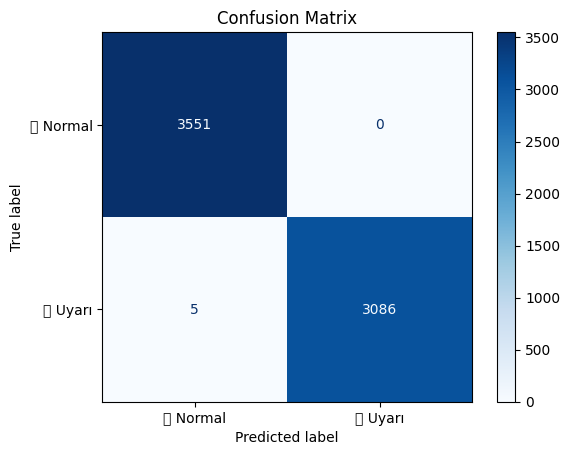

In [93]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion matrix oluştur
cm = confusion_matrix(y_test, y_pred)

# Görselleştir
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['✅ Normal', '🚨 Uyarı'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


In [94]:
# Veri setinden bir örnek satır al
test_sample = df[top_features].iloc[[1410]]  # örnek olarak ilk satır

# Tahmin yap
prediction = model.predict(test_sample)

# Tahmini etiketle göster
etiket_map = {0: "✅ Normal", 1: "🚨 Uyarı"}
print("Tahmin:", etiket_map[prediction[0]])


Tahmin: ✅ Normal
